In [1]:
import os

In [26]:
%load_ext autoreload
%autoreload 2

In [16]:
from IConNet.signal import nextpow2

In [17]:
nextpow2(6)

3

In [27]:
import IConNet

In [19]:
IConNet.signal.general_cosine_window(8,[0.5,0.5])

tensor([0.0000, 0.1883, 0.6113, 0.9505, 0.9505, 0.6113, 0.1883, 0.0000])

In [29]:
IConNet.signal.absolute_normalization([-0.5,1,0.4])

array([0.5, 1. , 0.4])

In [50]:
from scipy.fft import fft, rfft, fftshift, ifft, irfft, ifftshift, rfftn, irfftn

In [33]:
x = [1., 1.2, 3., 1.3, 4.]

In [38]:
import numpy as np

In [42]:
ifft(fft(x))

array([1. +0.j, 1.2+0.j, 3. +0.j, 1.3+0.j, 4. +0.j])

In [44]:
ifft(fft(x)).real

array([1. , 1.2, 3. , 1.3, 4. ])

In [45]:
irfft(rfft(x))

array([1.71952882, 2.26266717, 2.59141353, 3.92639048])

In [48]:
irfft(np.abs(rfft(x)))

array([4.50530728, 1.68386233, 2.62696806, 1.68386233])

In [51]:
irfftn(rfftn(x, len(x)), len(x))

array([1. , 1.2, 3. , 1.3, 4. ])

In [52]:
irfftn(rfftn(x))

array([1.71952882, 2.26266717, 2.59141353, 3.92639048])

In [154]:
irfftn(rfftn(x, len(x)))

array([1.71952882, 2.26266717, 2.59141353, 3.92639048])

In [155]:
irfftn(rfftn(x), len(x))

array([1. , 1.2, 3. , 1.3, 4. ])

In [53]:
z = [0, .2, 1.1, .5, 0.]

In [54]:
np.convolve(x,z)

array([0.  , 0.2 , 1.34, 2.42, 4.16, 3.73, 5.05, 2.  , 0.  ])

In [89]:
xf = rfftn(x, len(x))
zf = rfftn(z, len(z))

In [91]:
xf*zf

array([18.9       +0.j        ,  1.97791203-1.57741403j,
       -2.10291203+0.23428607j])

In [93]:
oe.contract('x,z->xz', torch.tensor(xf), torch.tensor(zf))

tensor([[ 18.9000+0.0000j, -12.9425-5.7003j,   3.4925+4.7573j],
        [ -1.5694+2.9947j,   1.9779-1.5774j,  -1.0438+0.1584j],
        [ -3.3806+5.8727j,   4.0862-3.0020j,  -2.1029+0.2343j]],
       dtype=torch.complex128)

In [95]:
oe.contract('x,z->xz', torch.tensor(xf), torch.tensor(zf[:2]))

tensor([[ 18.9000+0.0000j, -12.9425-5.7003j],
        [ -1.5694+2.9947j,   1.9779-1.5774j],
        [ -3.3806+5.8727j,   4.0862-3.0020j]], dtype=torch.complex128)

In [99]:
oe.contract('x,z->x', torch.tensor(xf), torch.tensor(zf))

tensor([ 9.4500-0.9430j, -0.6353+1.5757j, -1.3973+3.1050j],
       dtype=torch.complex128)

In [104]:
irfftn(oe.contract('x,z->x', torch.tensor(xf), torch.tensor(zf)).numpy(), len(x))

array([1.07696437, 0.93420902, 2.73362069, 1.11211146, 3.59309446])

In [116]:
irfftn(oe.contract('x,z->x', torch.tensor(xf), torch.tensor(zf)).numpy(), len(x)+len(z)-1)

array([ 0.59831354, -0.01665183,  0.73645212,  1.57016667,  1.26856141,
        0.62102742,  0.98151979,  1.89809042,  1.79252045])

In [105]:
from IConNet.fftconv import complex_matmul

In [112]:
complex_matmul(torch.tensor(xf[None, None, :]), torch.tensor(zf[None, None, :]))

tensor([[[18.9000+0.0000j,  1.9779-1.5774j, -2.1029+0.2343j]]])

In [113]:
xzf = complex_matmul(torch.tensor(xf[None, None, :]), torch.tensor(zf[None, None, :])).numpy()
irfftn(xzf, len(x))

array([[[3.73     , 5.2500005, 3.34     , 2.4199998, 4.1600003]]],
      dtype=float32)

In [114]:
irfftn(xzf, len(x)+len(z)-1)

array([[[2.0722222, 2.5296037, 2.9428601, 2.4625506, 1.4823445,
         1.1756319, 1.765227 , 2.2880518, 2.181508 ]]], dtype=float32)

In [115]:
ifftshift(irfftn(xzf, len(x)+len(z)-1))

array([[[1.4823445, 1.1756319, 1.765227 , 2.2880518, 2.181508 ,
         2.0722222, 2.5296037, 2.9428601, 2.4625506]]], dtype=float32)

In [118]:
ifftshift(irfftn(xzf, len(x)+len(z)-1)) - irfftn(oe.contract('x,z->x', torch.tensor(xf), torch.tensor(zf)).numpy(), len(x)+len(z)-1)

array([[[0.88403097, 1.19228371, 1.02877484, 0.71788517, 0.91294665,
         1.45119481, 1.54808393, 1.04476971, 0.67003019]]])

In [110]:
xf

array([10.5       +0.j        , -0.87188471+1.66372332j,
       -1.87811529+3.26259478j])

In [55]:
import opt_einsum as oe

In [58]:
oe.contract('l,l  -> l', x,z)

array([0.  , 0.24, 3.3 , 0.65, 0.  ])

In [60]:
oe.contract('l,l  -> ...', x,z)

array(4.19)

In [61]:
from einops import repeat

In [63]:
import torch

In [79]:
xx = torch.arange(10).reshape(2,5)
xx

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [86]:
zz = torch.linspace(4, -10, 15).reshape(3,5)
zz

tensor([[  4.,   3.,   2.,   1.,   0.],
        [ -1.,  -2.,  -3.,  -4.,  -5.],
        [ -6.,  -7.,  -8.,  -9., -10.]])

In [87]:
xzl = oe.contract('xl,zl  -> xzl', xx,zz)
print(xzl.size())
xzl

torch.Size([2, 3, 5])


tensor([[[  0.,   3.,   4.,   3.,   0.],
         [ -0.,  -2.,  -6., -12., -20.],
         [ -0.,  -7., -16., -27., -40.]],

        [[ 20.,  18.,  14.,   8.,   0.],
         [ -5., -12., -21., -32., -45.],
         [-30., -42., -56., -72., -90.]]])

In [88]:
oe.contract('xl,zl  -> zl', xx,zz)

tensor([[  20.,   21.,   18.,   11.,    0.],
        [  -5.,  -14.,  -27.,  -44.,  -65.],
        [ -30.,  -49.,  -72.,  -99., -130.]])

In [120]:
from scipy import signal as sg

In [121]:
sg.convolve(x,z)

array([0.  , 0.2 , 1.34, 2.42, 4.16, 3.73, 5.05, 2.  , 0.  ])

In [122]:
sg.fftconvolve(x,z)

array([0.00000000e+00, 2.00000000e-01, 1.34000000e+00, 2.42000000e+00,
       4.16000000e+00, 3.73000000e+00, 5.05000000e+00, 2.00000000e+00,
       3.94745964e-16])

In [123]:
sg.oaconvolve(x,z)

array([0.00000000e+00, 2.00000000e-01, 1.34000000e+00, 2.42000000e+00,
       4.16000000e+00, 3.73000000e+00, 5.05000000e+00, 2.00000000e+00,
       3.94745964e-16])

In [124]:
from torch.nn import functional as F

In [ ]:
def overlap_add(X, stride):
    n_fft = X.shape[-1]
    output_len = n_fft + stride * (X.shape[2] - 1)
    return F.fold(X, 
                  output_size=(1, output_len), 
                  kernel_size=(1, n_fft), 
                  stride=stride).flatten(1)

In [126]:
from nnAudio import utils as nnaF

In [128]:
nnaF.overlap_add(torch.tensor(x),2)

IndexError: tuple index out of range

In [149]:
test_fx = torch.linspace(0,10,10)
torch.where((test_fx < 8) & (test_fx > 2), 1, 0)

tensor([0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [150]:
test_fx

tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])

In [167]:
from einops import reduce, rearrange

In [152]:
reduce(test_fx, '(2 l) -> l', 'sum')

tensor([ 5.5556,  7.7778, 10.0000, 12.2222, 14.4444])

In [153]:
reduce(test_fx, '(l 2) -> l', 'sum')

tensor([ 1.1111,  5.5556, 10.0000, 14.4444, 18.8889])

In [156]:
import soundfile as sf

In [157]:
data_dir = '../audio/audio_explore/data/'

In [160]:
file_name = 'c4_scale.wav'
y, sr = sf.read(data_dir+file_name)
print(sr)
print(y.shape)

44100
(264600, 2)


In [176]:
ry.shape

torch.Size([2, 1, 5302])

In [175]:
Y = rearrange(torch.tensor(y), 'n c -> c 1 n')
ry = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512)

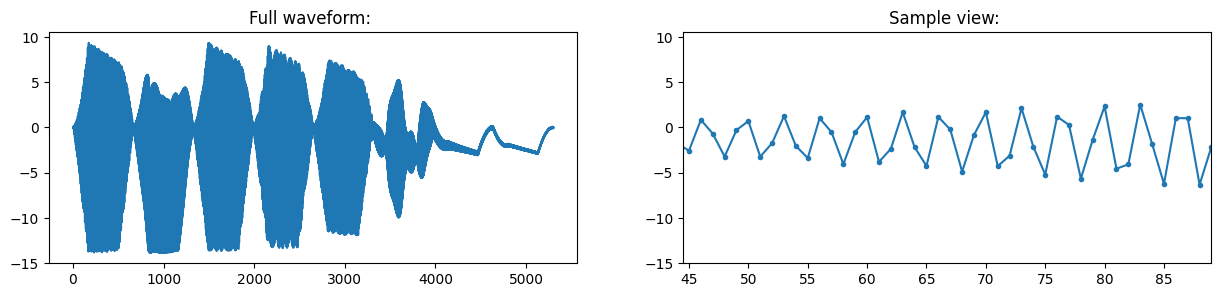

In [178]:
IConNet.signal.visualize_waveform(y=ry[0][0].numpy(), sr=890)

In [184]:
sf.write('s4_890_nooffset.wav', ry[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


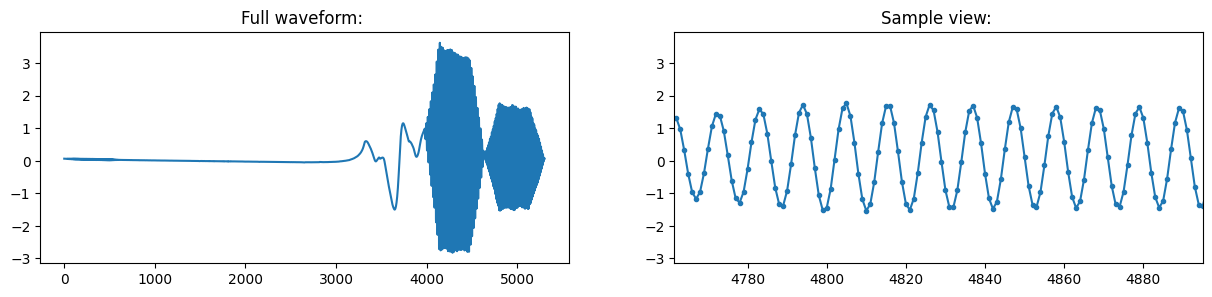

In [182]:
ry2 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, orig_fmin=890)
print(ry2.shape)
IConNet.signal.visualize_waveform(y=ry2[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])

In [185]:
sf.write('s4_890_offset890.wav', ry2[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


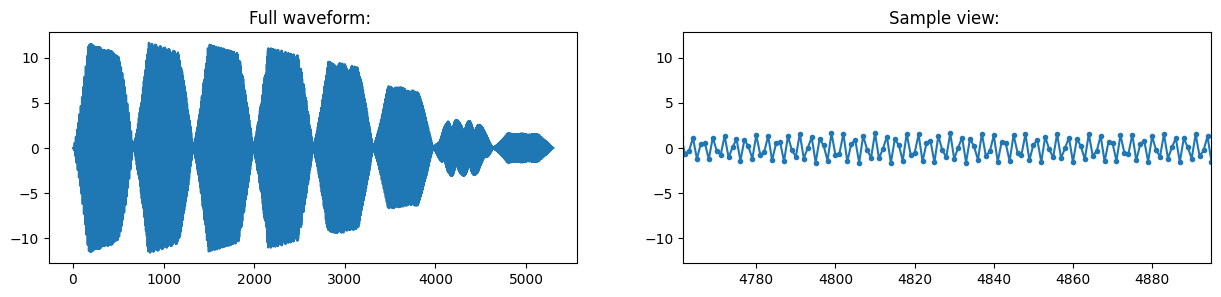

In [186]:
ry3 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, orig_freq_offset=400)
print(ry3.shape)
IConNet.signal.visualize_waveform(y=ry3[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])
sf.write('s4_890_offset400.wav', ry3[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


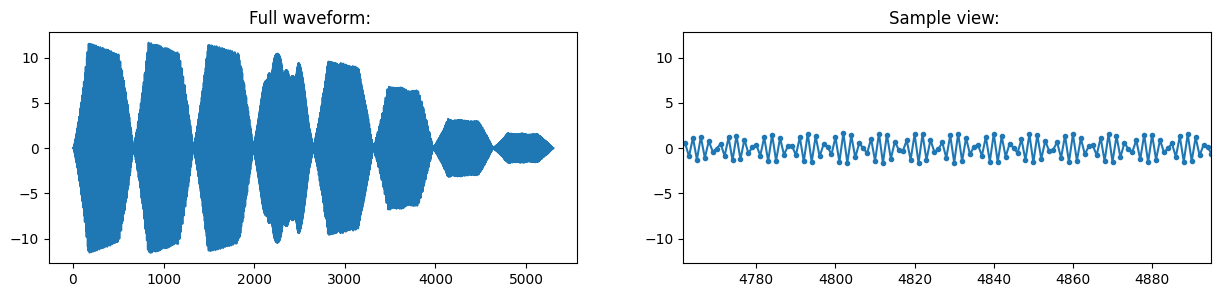

In [187]:
ry4 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, orig_freq_offset=261)
print(ry4.shape)
IConNet.signal.visualize_waveform(y=ry4[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])
sf.write('s4_890_offset261.wav', ry4[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


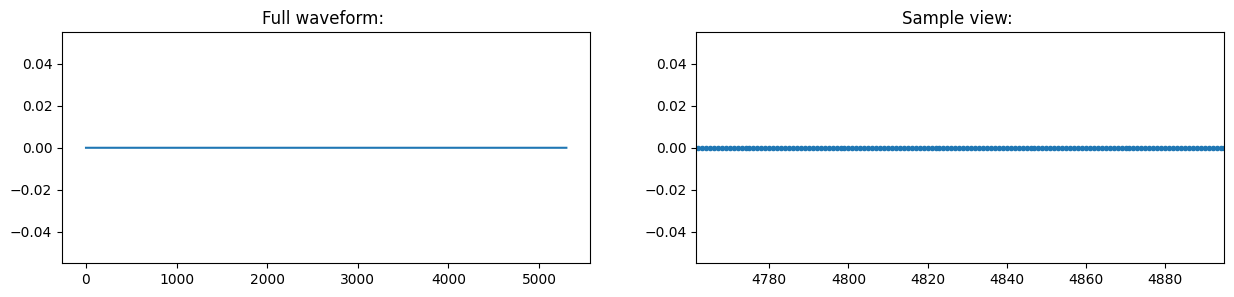

In [193]:
ry5 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, 
                                     orig_freq_offset=890, orig_freq_min=890)
print(ry5.shape)
IConNet.signal.visualize_waveform(y=ry5[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])
sf.write('s4_890_offset890_2.wav', ry5[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


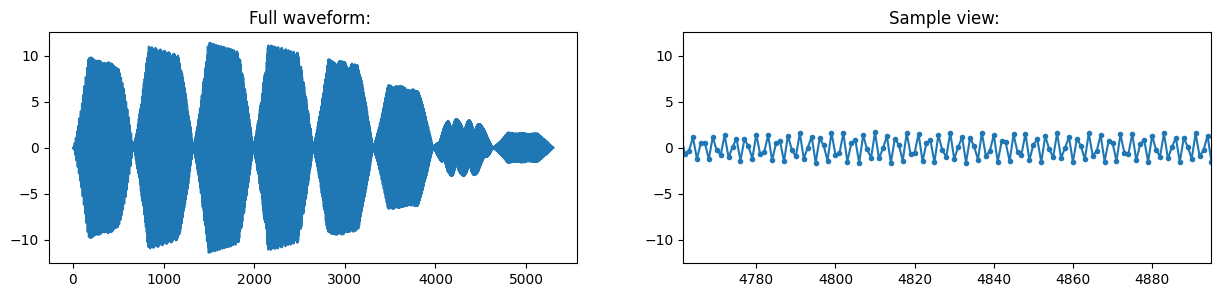

In [191]:
ry5 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, 
                                     orig_freq_offset=400, orig_freq_min=400)
print(ry5.shape)
IConNet.signal.visualize_waveform(y=ry5[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])
sf.write('s4_890_offset400_2.wav', ry5[0][0].numpy(), 890)

torch.Size([2, 1, 5302])


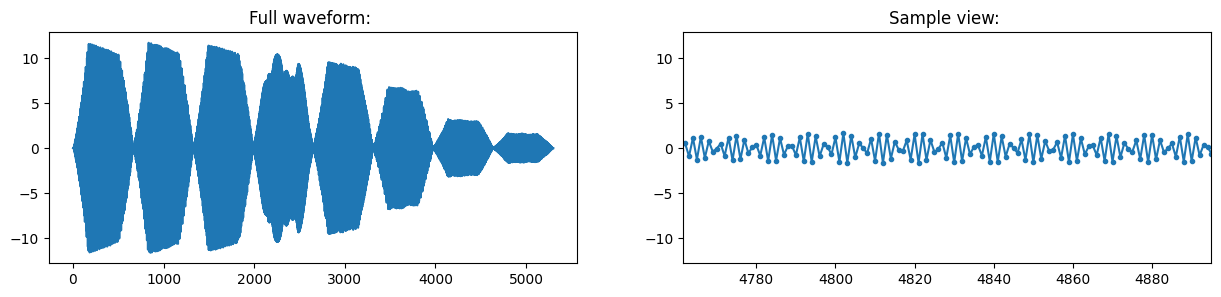

In [192]:
ry5 = IConNet.signal.downsample_wave(Y, 44500, 890, lowpass_filter_width=512, 
                                     orig_freq_offset=261, orig_freq_min=261)
print(ry5.shape)
IConNet.signal.visualize_waveform(y=ry5[0][0].numpy(), sr=890, zoom_xlim=[5.35,5.5])
sf.write('s4_890_offset261_2.wav', ry5[0][0].numpy(), 890)